# Polygon Smoothing Riddle

Authors: Dr. L. S. and Dr. M. U. 
(the sensitive affiliations are known to the publisher who hereby grants the absence of any conflict of interests for the given topic)

As recently brought forward in a notable but private discussion board by Dr. R. M., the following phenomenon can be observed:

[1] https://www.jasondavies.com/random-polygon-ellipse/

Of course, the following questions immediatley arise: 
1. Why does it result in ellipses?
2. Why are they oriented on the 45° diagonal
3. What properties of starting polyagon do we need to result in a circle or line?

We try to address these in the following.

**ADDENDUM**: Please not the new section "Fourier Analysis" with a more theoretical approach.

## Helper Functions
We represent polygon points by numbers in the complex plane. This will turn out to lead to an elegant description of the phenomenon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show_points(points, ax=None, labels=True, dots=True, linewidth=0.5):
    """Plot all points in complex plane. If given, use the axis given, otherwise build new figure."""
    
    X = [x.real for x in points]
    Y = [x.imag for x in points]
    X.append(X[0]) # start point is end point
    Y.append(Y[0])
    
    if ax == None:
        fig = plt.figure(figsize=[4,4])
        ax = fig.add_subplot(111)
        
    ax.set_aspect('equal', 'datalim')

    if dots: ax.scatter(X,Y, color='red')
    ax.plot(X,Y, color='black', linewidth=linewidth)
    
    if labels:
        for i in range(len(points)):
            ax.annotate(i, (X[i], Y[i]), textcoords="offset points", xytext=(0,10))


The smoothing of the polygon by calculating the point centers is done with

In [4]:
def do_smoothing(points, steps):
    """Build average of neighboring points, apply it multiple times."""
    
    for i in range(steps):
        points = (points + np.roll(points, 1))/2 
        
    return points

## Polygon Evolution Example
Random starting points

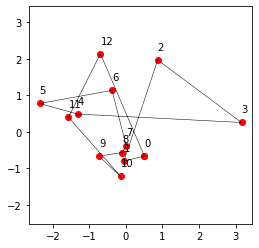

In [5]:
N = 13
init_points = np.random.standard_normal(N) + np.random.standard_normal(N)*1j
show_points(init_points)

Let it evolve:

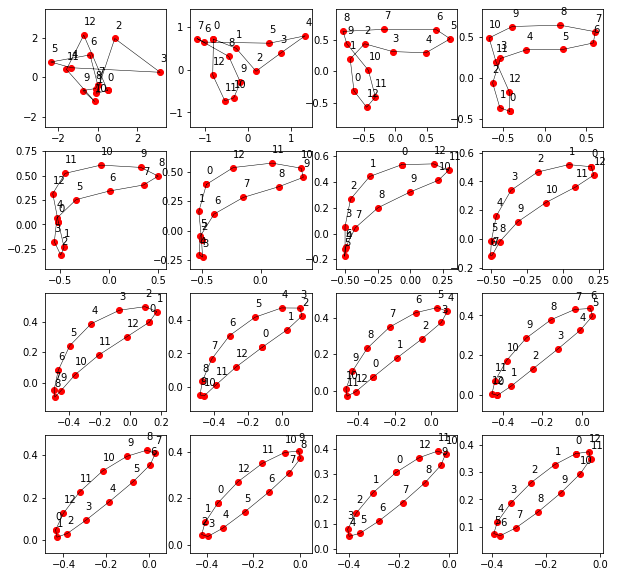

In [59]:
points = init_points

# iterate smoothing:
steps = 3 # steps between plots
plt.figure(figsize=[10,10]) 
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    show_points(points, ax)
    points = do_smoothing(points, steps)

### Answer to 2. Question

Why we observe 45° alignment can be answered here: We don't observe that at all.

This peculiar alignment was an artifact of the zooming method which was used in [1]: While we iterate, the polygons get smaller in radius. If we zoom in X and Y direction independently, we will always make it look like being on a diagonal. The alignment is enforced by the zooming and has nothing to do with the smoothing procedure.

Above we use a uniform zoom factor (equal axis), which doesn't break the rotation symmetry and thereby conserves to true alignment of the ellipse.

## Prediction of Final Ellipse (aka "The Magic Happens Here")

The smoothing procedure is a linear operation which can be formulated in a matrix representation. 
$$\mathbb S \, \bf x_k = \bf x_{k+1}$$

To simplify the analysis, we can recall our QT lectures and do an eigenstate decomposition. Eigenstates (or eigenpolygons) do not change their shape shape under the smoothing operation but are only shrinked and rotated by a complex prefactor (eigenvalue).

$$ \mathbb S \, \bf{ x} = \lambda \bf{ x} $$

### Dominant Eigenstates

Of course we could do a more strict analysis, but let's do it physicist free-style way (although Dr. S. wasn't very happy with that...): 

We found from numerical calculation (eigenstate analysis) of some polybon point numbers N, that circlular arrangements are eigenstates. They have the largest eigenvalue, i.e. they are the least suppressed/decreased in size from generation to generation, while all the other eigenstates converge faster to zero extend. We have observed this for N=3 and 5, so it must be a very general fact, right?

Therefore, after a few iterations, circles are the only surviving contribution, everything else decreases much faster in size. So lets phrase the

**Hypothesis**: Circles are dominant eigenstates under the smoothing operation. 

There are two independent cicular arrangments, namely

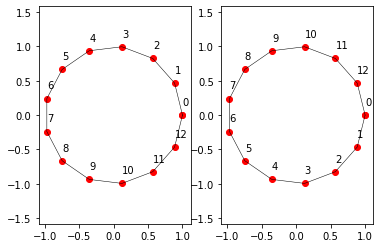

In [5]:
eigenstate1 = [np.exp(1j* 2*np.pi/N * k) for k in range(N)]  # clockwise orientation
eigenstate2 = [np.exp(-1j* 2*np.pi/N * k) for k in range(N)] # counter-clockwise orientation

show_points(eigenstate1, plt.subplot(121))
show_points(eigenstate2, plt.subplot(122))

Note their clock/counter-clockwise orientation. Let's check whether these are really eigenstates:

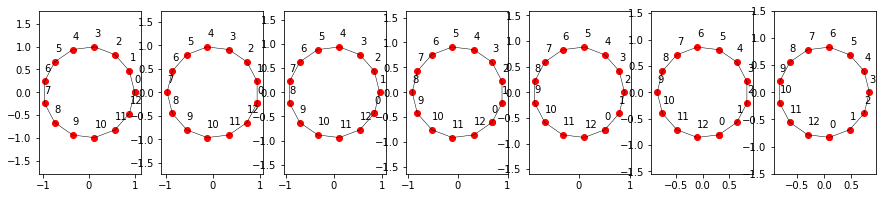

In [6]:
points = eigenstate1

# iterate smoothing:
n = 7
plt.figure(figsize=[15,3]) 
for i in range(n):
    ax = plt.subplot(1,n,i+1)
    show_points(points, ax)
    points = do_smoothing(points, 1)

Apparently they are. They turn around, but that's fine as it only is a complex prefactor introducing the turning and shrinking:

In [7]:
do_smoothing(eigenstate1, 1) / eigenstate1

array([0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j, 0.94272801-0.23236159j,
       0.94272801-0.23236159j])

Works out as expected. we even get the eigenvalues for free.

In [8]:
eigenvalue1 = (do_smoothing(eigenstate1, 1) / eigenstate1)[0]
eigenvalue2 = (do_smoothing(eigenstate2, 1) / eigenstate2)[0]

eigenvalue1, eigenvalue2

((0.9427280128266048-0.2323615860218846j),
 (0.9427280128266048+0.2323615860218846j))

### Decompose Initial State into Eigenstates
In order to find out how much of the eigenstates are included in our random initial state, we project the inital state onto the eigenvectors. This calls for the use of an inner product, which we readily have at hand with the familiar

In [9]:
def dot(v1, v2):
    """Dot Product between complex vectors"""
    return np.dot(v1, np.conj(v2))

Like in the good old QT days with Prof. Hasenfratz, we do first a normalization and check

In [10]:
eigenstate1 = eigenstate1 / np.sqrt(dot(eigenstate1, eigenstate1))
eigenstate2 = eigenstate2 / np.sqrt(dot(eigenstate2, eigenstate2))

dot(eigenstate1, eigenstate1), dot(eigenstate2, eigenstate2)

((1+0j), (1+0j))

Nicely normalized: Check. We can proceed:

Now, let's do the projection and get the complex coefficients


In [11]:
c1 = dot(init_points, eigenstate1)
c2 = dot(init_points, eigenstate2)

c1, c2

((0.5149093832008008-1.950855436819647j),
 (0.07602149507747744+1.113740507931655j))

Good, both eigenstates seem to be present in there. What can we do with that?

### Representation as Ellipse

An general ellipse is parametrized by $\varphi$ with $a,b$ being the half axis and $\theta$ a rotation angle:

In [12]:
def ellipse(a,b, phi, theta): 
    """get coordinates of ellipse with half axes a,b rotated with theta, along parameter phi."""
    
    c, s = a*np.cos(phi), b*np.sin(phi) 
    x = (s, c) # ellipse coordinate vector
    
    # rotate it
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c))) # rotation matrix
    x_rot = np.matmul(R, x)
    
    return x_rot[0] + 1j * x_rot[1] # go to complex representation

As our calculations show (they are still only on our window and wait to be transfered to the appendix in due time, of course), a superposition of both eigenstates result in a ellipse with the following parameters

$$ a = \left|\frac{|c_1| - |c_2|}{\sqrt N}\right|, \quad b  = \frac{|c_1| + |c_2|}{\sqrt N} $$

and
$$ \theta = \frac{\arg{c_1} + \arg{c_2}}{2}$$

So let's give it a try:

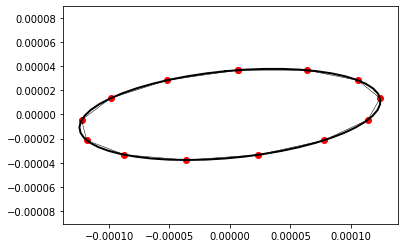

In [13]:
steps = 300 # how many steps to iterate 

# propagete eigenstates through smoothing operation by mulitplying eigenvalue 'steps' times
c1_it = c1 * np.power(eigenvalue1, steps)
c2_it = c2 * np.power(eigenvalue2, steps)

# magic, analytic formulas
a = np.abs(np.abs(c1_it) - np.abs(c2_it)) / np.sqrt(N) 
b = (np.abs(c1_it) + np.abs(c2_it)) / np.sqrt(N) 
theta = (np.angle(c1_it) + np.angle(c2_it)) / 2

ellipse_pts = [ellipse(a, b, phi, theta) for phi in np.linspace(0, 2*np.pi, 50)]

ax = plt.subplot(111)
show_points(ellipse_pts, labels=False, dots=False, ax=ax, linewidth=2)

show_points(do_smoothing(init_points - np.mean(init_points), steps), labels=False,ax=ax)

The comparison between the predicted shape and iteratively computed point distribution is rather satisfying.

As an encore, we provide the comparison of the prediction based only on the two dominant eigenvalues in comparison to the computed iterated polygon:

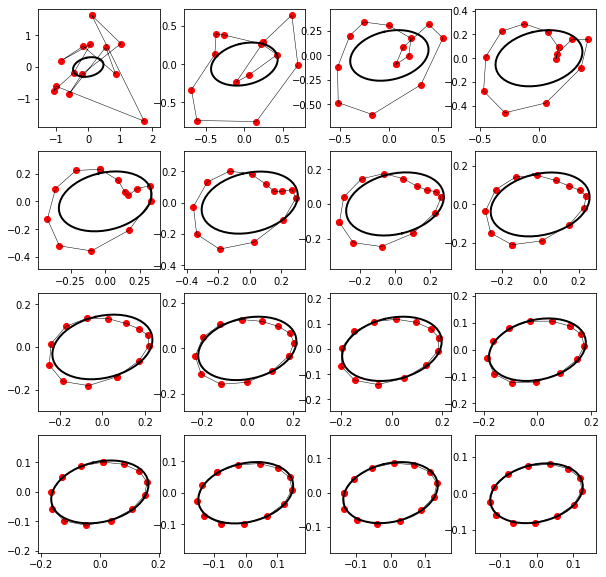

In [28]:
def show_iteration_vs_dominantEigenstates(): 
    points = np.random.standard_normal(N) + np.random.standard_normal(N)*1j
    points = points - np.mean(points)

    c1 = dot(points, eigenstate1)
    c2 = dot(points, eigenstate2)

    steps = 3 # steps between plots

    plt.figure(figsize=[10,10])

    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        
        # show smoothed points
        show_points(points, ax, labels=False)

        # now, calculate our analytic prediction ellipse for this iteration:

        # propagete eigenstates through smoothing operation by mulitplying eigenvalue 'steps' times
        c1_it = c1 * np.power(eigenvalue1, i*steps)
        c2_it = c2 * np.power(eigenvalue2, i*steps)

        a = np.abs(np.abs(c1_it) - np.abs(c2_it)) / np.sqrt(N)
        b = (np.abs(c1_it) + np.abs(c2_it)) / np.sqrt(N)
        theta = (np.angle(c1_it) + np.angle(c2_it)) / 2
        ellipse_pts = [ellipse(a, b, phi, theta) for phi in np.linspace(0, 2*np.pi, 50)]

        show_points(ellipse_pts, labels=False, dots=False, ax=ax, linewidth=2)

        # for next iteration, do smoothing
        points = do_smoothing(points, steps)
        
show_iteration_vs_dominantEigenstates()

We see, how the dominant eigenstates start to fully describe the evolution.

## Due to Dr. A.L.'s Special Request: Enforcement of Circular Convergence

Comparison before and after "Face-lifting":


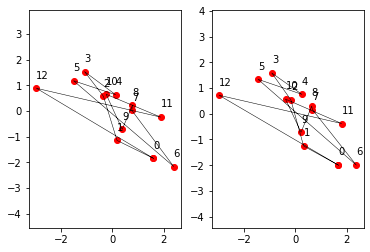

In [29]:
init_points = np.random.standard_normal(N) + np.random.standard_normal(N)*1j

init_points_facelifted = init_points - dot(init_points, eigenstate1) * eigenstate1 
# eigenstate1 is hereby fully removed, only eigenstate2 and the other contributions survive

show_points(init_points, plt.subplot(121))
show_points(init_points_facelifted, plt.subplot(122))

Let it roll...

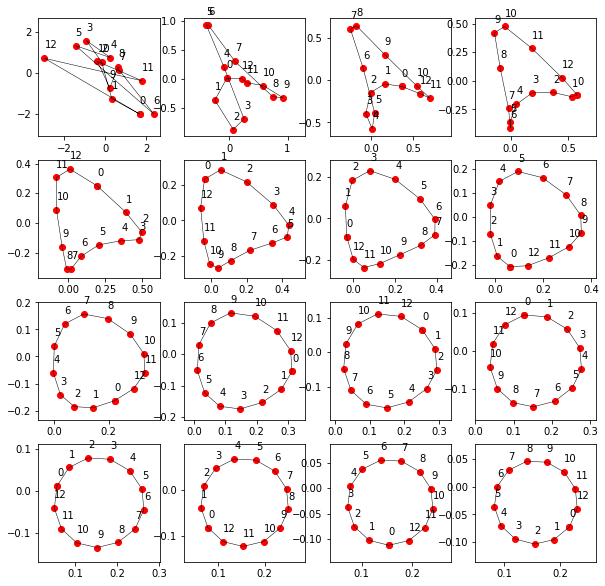

In [32]:
steps = 4 # steps between plots

points = init_points_facelifted

plt.figure(figsize=[10,10]) 
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    show_points(points, ax)
    points = do_smoothing(points, steps)

Amazingly, here you have your ordered circle.

**Homework Exercise**: How about a counter-clockwise arrangement? :-)

### Answer to Question 3

We can conclude, that the following must be given in order to converge into a circle: Only clockwiseness or only counter-clockwiseness must be included in your start polygon, then it will evolve into a circle. While these terms are not well established in the community yet, we are confident that our work will have its impact here.
 

## Conclusions and Acknowledgments
Dear reader, thank you for your appreciated attention!

With that we would like to thank for all inspirational inputs from our "physicist" friends!

Yours sincerly, L. and M.

# Addendum: Fourier Analysis Approach

The sections in the main publication considered the smoothing process as a general linear operation. A eigenvecor/-state analysis allowed thereby to simplify the problem and understand its evolution through iterations. The yielded eigenstates were shown to be circles whose geometrical image allowed an intuitive understanding why they are eigenstates.

## Shift Invariance
If we go on step further in analysis, we can readily observe that we not only have a linear operation, but a translation invariant: If we shift the indizes of the point of input state, the smoothing process $\mathbb S$ will yield the same output as before, but with this output after the index shift. Index shift denoted by $\mathcal R$ and smoothing operation $\mathbb S$ commute: 

$$ \vec x = (x_1, x_2, ... x_N), \, \mathcal R\,\vec x = \vec x' = (x_2, x_3, ... x_N, x_1):  \quad \mathcal R (\mathbb S\,\vec x) =  \mathbb S (\mathcal R \,\vec x) = \frac 1 2 (x_2+x_3, x_3+x_4, ...)$$ 


A general shift-invariant linear operation on continous functions are given by convolutions
$$ (f \ast g)(x) \doteq \int \,dy\, g(y)\,f(x-y) = h(x), \quad f(x+\Delta x) \ast g(x) = h'(x) = h(x+\Delta x)$$

The convolution Fourier theorem tells us, that their corresponding Fourier transforms $f(x) = \int\,dk\, \tilde{f}(k)\, \exp(ikx)$, ...,  are related by a simple multiplication

$$ \tilde{f}(k) \, \tilde{g}(k) = \tilde{h}(k) $$

This is an interesting fact and allows to write a convolution in much simpler terms. Let's try to apply this to our case.

## Discrete Fourier Transforms (DFT) Theory

As phycisists, we are well experienced with the continous Fourier transform. But we obviously dont have an continous function but discrete points  $(x_1, x_2, ... x_n)$. Here is a short intro to the discret case. DFT is a very common tool in digital signal processing where the signal is sampled at a fixed frequency...


### Discretness

Let's define $f(d), d \in \mathbb Z$. This simplifies the Fourier transform to

$$f(d) = \int^{2\pi}_{0}dk\, \tilde{f}(k)\, \exp(ikd)$$

Intuition: The wavevector spectrum is limited to $0...2\pi$. Any oscillation faster than "one oscillation per 1 unit" is not needed, as we only evalute $f(d)$ at integer $d$. 
(This result is known as Nyquist-Shannon theorem and can be gained in a more formal way by multiplying a general $f(x)$ with a Dirac comb which results in the mentioned consequences in wavevector spectrum).



### Finiteness

The above results still assumed an umlimited number of points involved. Without loss of generality, we can define  $f(d)$ periodic, such that $f(d) = f(d+N)$ holds. We limit the function to $N$ different values. In general, a periodic function, like the newly defined $f(d)$, can be represented with a discrete Fourier series

$$ f(x) = \sum_{k=-\inf}^{\inf}\, a(k) \, e^{i\frac{2\pi k}{N} x}, \quad a(k) \in \mathbb C .$$

Intuition: Only wavevectors with wavelenghts = repetion cycles which are integer fractions of the function cycle length $N$, i.e. cycles which repeat after length $N$, are present.


### Discrete and Finite -> DFT

Taking both results, we ariive at the conclusion, that

$$ f(d) = \sum_{k=0}^{N-1}\, a(k) \, e^{i\frac{2\pi k}{N} d} $$

where the coefficients $a(k) = \tilde{f}(k), \, k \in \{0, \ldots, N-1\}$ are the discrete Fourier transform of $f(d)$.

We can explicitly calculate for two summands

$$ \sum_{d=0}^{N-1}  e^{i\frac{2\pi k}{N} d}  e^{-i\frac{2\pi k'}{N} d} = N \delta_{k-k'} $$

and thereby observe the orthogonality of different terms which is well known in the continous case (where a Dirac delta function is used). 




### Discrete Convolution
In analogy to the continous case, a discrete, cylic convolution can be defined by 

$$ (f \ast g) (d) = \sum_{d'=0}^{N-1} g(d') f(d-d') $$ 

where we assumed $f(d)$ to be periodic. By explicitly calculating, we find 
$$ (f \ast g) (d)  = \sum_{d'=0}^{N-1} \left(\sum_{k=0}^{N-1}\, \tilde g(k) \, e^{i\frac{2\pi k}{N} d'}\right) \left(\sum_{k'=0}^{N-1}\, \tilde f(k') \, e^{i\frac{2\pi k'}{N} (d-d')}\right)
= \sum_{k=0}^{N-1} \sum_{k'=0}^{N-1}\, \tilde g(k) \, \tilde f(k') \, \sum_{d'=0}^{N-1} e^{i\frac{2\pi k}{N} d'} e^{i\frac{2\pi k'}{N} (d-d')} $$

Evaluating the sum over $d'$ and using the orthogonality condition found above, we find a $N\delta_{k-k'}$ and therefore 

$$ (f \ast g) (d)  = N\,\sum_{k=0}^{N-1} \tilde g(k) \, \tilde f(k) \, e^{i\frac{2\pi k}{N} d} .$$

This is the equivalent result to the continous case: The convolution is a mutliplication in Fourier space.

## Polygon Smoothing as Discrete Convolution
If we chose

$$ f(d)  \doteq x_{d-1}, \, d \in {0, \ldots, N-1}, \quad  g(0)= g(1) \doteq \frac 1 2, \, g(d) \doteq 0, \, d \in \{2,\ldots, N\}$$

and furthermore impose periodicity with $f(d+N) = f(d)$, equally on $g(d)$, both function are defined over $\mathbb Z$, but represent $N$ independent complex points. With and the above defined discrete convolution, we find

$$ (f \ast g) (d) = \sum_{d'=0}^{N-1} g(d') f(d-d') = h(d) = \frac{x_d+x_{d-1}} 2 $$



We observe that this corresponds to our smoothing/averaging process $\mathbb S$! It is a moving averaging operation performed on the set of points.

The Fourier convolution theorem tells us, that this linear, shift-invariant operation can be written in this discrete case with the transforms

$$ \tilde{h}(k) = N \tilde{f}(k)\,\tilde{g}(k), \, k \in \{0,N-1\}$$

If we iterate $G$ times through the smooting, we arrive at the simple result
$$ \tilde{h}(k) = \tilde{f}(k)\,(N\tilde{g}(k))^{G}$$

This fully determines the evolution. If $N|\tilde g(k)|<1$, the components at given $k$ are increasingly suppressed. **With this, we got all eigenstates of the smoothign operation for free: They are apparatly the Fourier components of different $k$**.

## Numeric Illustration

In [6]:
N = 13
initial_points = np.random.standard_normal(N) + np.random.standard_normal(N)*1j
f = initial_points

Let's generate to above defined $g(d)$ with

In [7]:
g = np.zeros(N)
g[[0,1]] = 1/2
print(g)

[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


Let Python calculate the DFT, as defined above, using FFT functions

In [8]:
f_tilde = np.fft.ifft(f)
g_tilde = np.fft.ifft(g)

The smoothing iteration using the convolution theorem is illustrated here togehter with the Fourier transform:

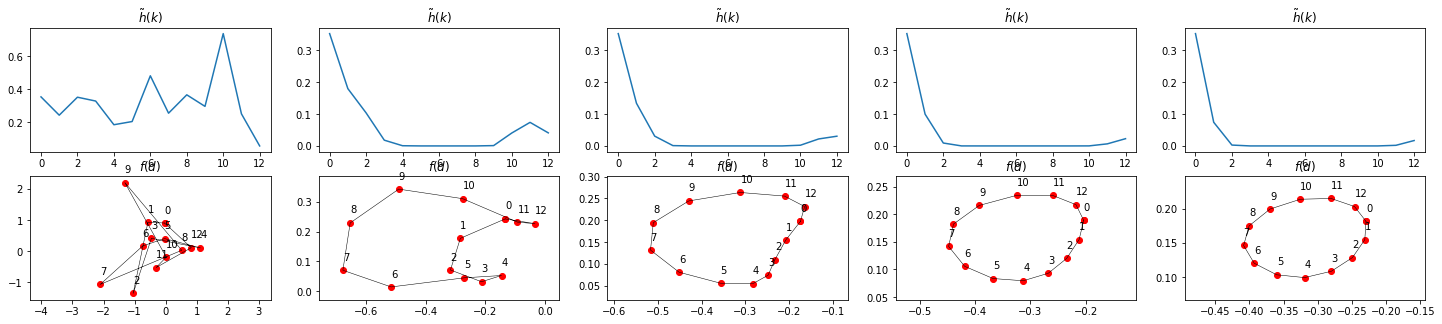

In [10]:
steps_per_image = 10
n = 5

plt.figure(figsize=[25,5]) 
for i in range(n):
    
    h_tilde = np.multiply(f_tilde, np.power(N*abs(g_tilde), i*steps_per_image)) # according to convolution fourier theorem, see above
    h = np.fft.fft(h_tilde)

    ax = plt.subplot(2,n,i+1)
    ax.set_title("$\\tilde h(k)$")
    ax.plot(abs(h_tilde))
    
    ax = plt.subplot(2,n,i+n+1)
    ax.set_title("$f(d)$")
    show_points(h, ax=ax)  

Things seemt to work out

### Interpretation

As abovious from the multiplication factor $\tilde g(k)$:

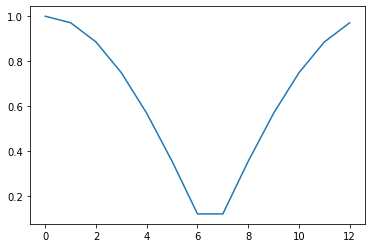

In [11]:
plt.plot(N*abs(g_tilde))

oscillations $k=0, 1$ and $N-1$ are dominant. All other are suppressed stronger and damped out in the iteration shown above. 

As can be seen in the DFT defition, $k=0$ corresponds to a constant, which here represents the center of gravity of the points which does not change through iterations: $\tilde g(0) = 1$. 
$k=1$ and $N-1$ are the already known clockwise and counterclockwise circles. If added up in a linear combination, they result in an ellipse. 

All the other Fourier terms are circles as well, but with winding number $W$ larger than one. Just a few examples:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


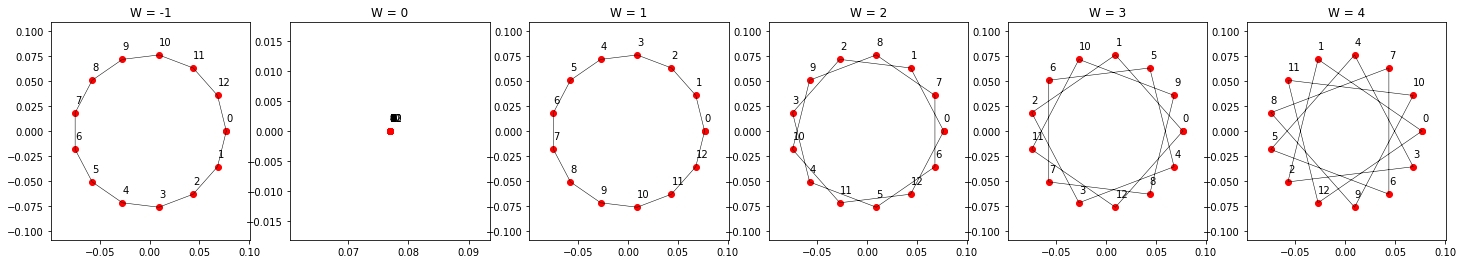

In [12]:
plt.figure(figsize=[25,4]) 
ws = range(-1,5)
for i, w in enumerate(ws):
    ax = plt.subplot(1,len(ws), i+1)
    ax.set_title("W = " + str(w))
    
    a = np.zeros(N)
    a[w % N] = 1
    h = np.fft.ifft(a)
    
    print(a)
    show_points(h, ax=ax)

Insofar, we have to correct our answer above: we arrive at pure circles of only winding number $W=1$ or -1 are present, not both. But any higher wining number of any sign (clockwise or counter clockwise) will be damped away anyways.

Geometrically, this is obvious: the more curved, the stronger diminished are the shapes in the smoothing process.

With that, we finally and ultimatley conclude :-)